In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns
sns.set()


with open("./data/after_critic_data.json", "r") as f:
    after_data_obj = json.loads(f.read())

with open("./data/before_critic_data.json", "r") as f:
    before_data_obj = json.loads(f.read())

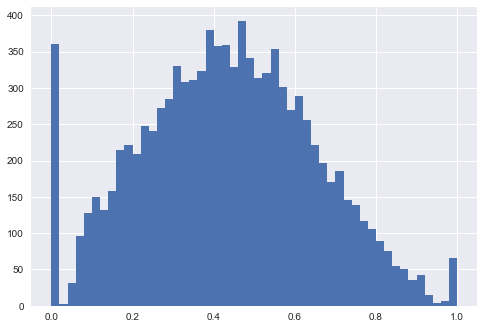

In [2]:
plt.hist(after_data_obj['all_ndcg_100s'], 50)
plt.show()

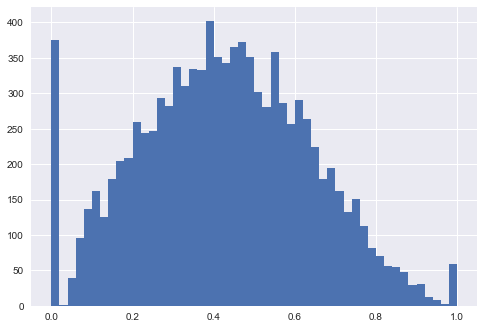

In [3]:
plt.hist(before_data_obj['all_ndcg_100s'], 50)
plt.show()

Now, we're going to get the difference...


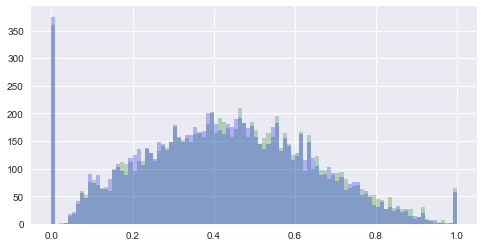

In [4]:
print("Now, we're going to get the difference...")

fig=plt.figure(figsize=(8,4.0))
plt.hist(after_data_obj['all_ndcg_100s'], 100, facecolor='g', alpha=0.25)
plt.hist(before_data_obj['all_ndcg_100s'], 100, facecolor='b', alpha=0.25)
plt.show()

In [5]:
num_users = len(before_data_obj['items_per_user'])
print("Number of users: {}".format(num_users))
print("Items per users: {}".format(sum(before_data_obj['items_per_user'])/num_users))

Number of users: 10000
Items per users: 71.8783


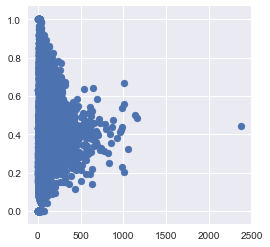

In [6]:
fig=plt.figure(figsize=(4,4.0))
plt.scatter(before_data_obj['items_per_user'], before_data_obj['all_ndcg_100s'])
plt.show()

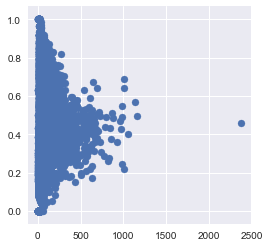

In [7]:
fig=plt.figure(figsize=(4,4.0))
plt.scatter(after_data_obj['items_per_user'], after_data_obj['all_ndcg_100s'])
plt.show()

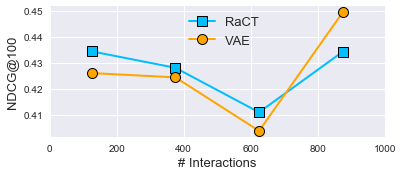

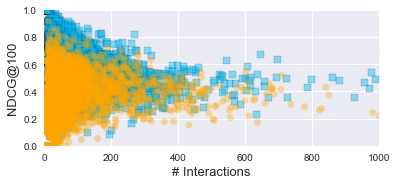

In [15]:
A = np.array(after_data_obj['all_ndcg_100s']) 
B = np.array(before_data_obj['all_ndcg_100s'])
C = np.array(after_data_obj['items_per_user'])


num_interval = 4
interval = []                
for i in C:
    interval.append( min( int(i//(1000/num_interval)), num_interval-1) )
interval = np.array(interval)


A_u, B_u = [], []
for c in range(num_interval):    
    A_u.append(np.mean( A[ np.where(interval == c)] ))
    B_u.append(np.mean( B[ np.where(interval == c)] ))


fig=plt.figure(figsize=(6,2.4))
stride_critic = max( int(len(A_u) / 8), 1)
stride_vae = max( int(len(A_u) / 8), 1)

C_u = [(i+0.5)*(1000/num_interval) for i in range(num_interval)]
plt.plot(C_u, A_u, '-', label='RaCT', marker= 's', color='deepskyblue', markevery=stride_critic,lw=2,  mec='k', mew=1 , markersize=10)
plt.plot(C_u, B_u, '-', label='VAE', marker= 'o', color='orange', markevery=stride_vae, lw=2,  mec='k', mew=1 , markersize=10)

leg = plt.legend(fontsize=13, shadow=True, loc=(0.4, 0.65))
plt.xlabel('# Interactions', fontsize=13)
plt.ylabel('NDCG@100', fontsize=13)

plt.xlim(0,1000)
plt.show()
fig.savefig('bd_mean_ndcg_ml.pdf', bbox_inches='tight')

fig=plt.figure(figsize=(6,2.5))
diff = A - B
plt.scatter(C[diff > 0], A[diff > 0],facecolor='deepskyblue',marker= 's', edgecolors='k', alpha=0.45, label='RaCT')
plt.scatter(C[diff < 0], A[diff < 0],facecolor='orange', edgecolors='None', alpha=0.35, label='VAE')


plt.grid('on')

plt.xlabel('# Interactions', fontsize=13)
plt.ylabel('NDCG@100', fontsize=13)

plt.ylim(0,1)
plt.xlim(0,1000)
plt.show()
fig.savefig('bd_scatter_plot_ml.pdf', bbox_inches='tight')

In [9]:
interval.max()

3

In [10]:
zipped_data = zip(before_data_obj['items_per_user'], before_data_obj['all_ndcg_100s'])
sorted_zipped_data = list(sorted(zipped_data))

assert len(sorted_zipped_data) == 10000

first_quartile = sorted_zipped_data[:2500]
second_quartile = sorted_zipped_data[2500:5000]
third_quartile = sorted_zipped_data[5000:7500]
fourth_quartile = sorted_zipped_data[7500:]

mean_ndcg_first_quartile = sum([q[1] for q in first_quartile])/2500
mean_ndcg_second_quartile = sum([q[1] for q in second_quartile])/2500
mean_ndcg_third_quartile = sum([q[1] for q in third_quartile])/2500
mean_ndcg_fourth_quartile = sum([q[1] for q in fourth_quartile])/2500


print(mean_ndcg_first_quartile)
print(mean_ndcg_second_quartile)
print(mean_ndcg_third_quartile)
print(mean_ndcg_fourth_quartile)


0.328193355411
0.436357588483
0.469319949059
0.469553128026


In [11]:
zipped_data = zip(after_data_obj['items_per_user'], after_data_obj['all_ndcg_100s'])
sorted_zipped_data = list(sorted(zipped_data))

assert len(sorted_zipped_data) == 10000

first_quartile = sorted_zipped_data[:2500]
second_quartile = sorted_zipped_data[2500:5000]
third_quartile = sorted_zipped_data[5000:7500]
fourth_quartile = sorted_zipped_data[7500:]

mean_ndcg_first_quartile = sum([q[1] for q in first_quartile])/2500
mean_ndcg_second_quartile = sum([q[1] for q in second_quartile])/2500
mean_ndcg_third_quartile = sum([q[1] for q in third_quartile])/2500
mean_ndcg_fourth_quartile = sum([q[1] for q in fourth_quartile])/2500


print(mean_ndcg_first_quartile)
print(mean_ndcg_second_quartile)
print(mean_ndcg_third_quartile)
print(mean_ndcg_fourth_quartile)


0.336856734201
0.441936678346
0.476501459297
0.480502961121


# Results:

This is obviously not a finished experiment. But, it does seem like it improves every section by almost the same amount... It actually improves high-sparsity ones more than low-sparsity ones...

In [12]:
after_vals, _, _ = plt.hist(after_data_obj['all_ndcg_100s'], 50)
before_vals, _, _ = plt.hist(before_data_obj['all_ndcg_100s'], 50)

print(after_vals - before_vals)

plt.clf()

plt.plot(range(len(after_vals)), after_vals - before_vals)





[-15.   2.  -7.   0.  -9. -12.   6. -21.  10.  13. -50.   4.  -6. -21.   3.
  -7.  -2. -24. -10. -22.   6.  16. -36.  19. -10.  12.  40.  -4.  15.  13.
  -2.  -8.  -2.  17. -25.  24.  12. -12.   4.  24.  19.  19.   0.   2.   5.
  11.   3.  -4.   3.   7.]


In [13]:
import pandas as pd


num_items = len(after_data_obj['items_per_user'])
num_interval = 5
num_items_per = num_items/num_interval
                
sorted_items_num = sorted(after_data_obj['items_per_user'])
sorted_items_idx = sorted(range(num_items), key=lambda k: after_data_obj['items_per_user'][k])
assert len(sorted_items_num) == 10000

interval = []                
for i in sorted_items_idx:
    interval.append(i//num_items_per)
                
                

data = []
# for i in range(0, num_items):
#     data.append([after_data_obj['items_per_user'][i], after_data_obj['all_ndcg_100s'][i], before_data_obj['all_ndcg_100s'][i], interval[i] ]) 

for i in range(0, num_items):
    data.append([after_data_obj['items_per_user'][i], after_data_obj['all_ndcg_100s'][i], 'Actor-Critic', interval[i] ]) 

for i in range(0, num_items):
    data.append([after_data_obj['items_per_user'][i], before_data_obj['all_ndcg_100s'][i], 'VAE', interval[i] ]) 
    
    
    
# data = [after_data_obj['items_per_user'], after_data_obj['all_ndcg_100s'], before_data_obj['all_ndcg_100s'] ] 
labels = ['#Items', 'NDCG@100', 'Method','%Items']
df = pd.DataFrame.from_records(data, columns=labels)


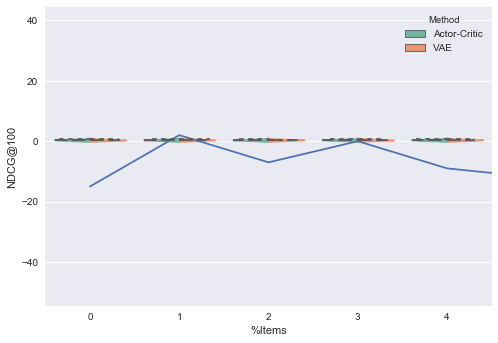

In [14]:
ax = sns.violinplot(x="%Items", y="NDCG@100", hue="Method", data=df, palette="Set2", split=True, scale="count",inner="quartile")
plt.show()